In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/hazmi/Downloads/ML/Heart/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape
#we can see that there are 304 instances and 14 variables in the data set.

(303, 14)

In [5]:
df.columns
#we can see that the column names are renamed.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
#View summary of dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Missing values in variables
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

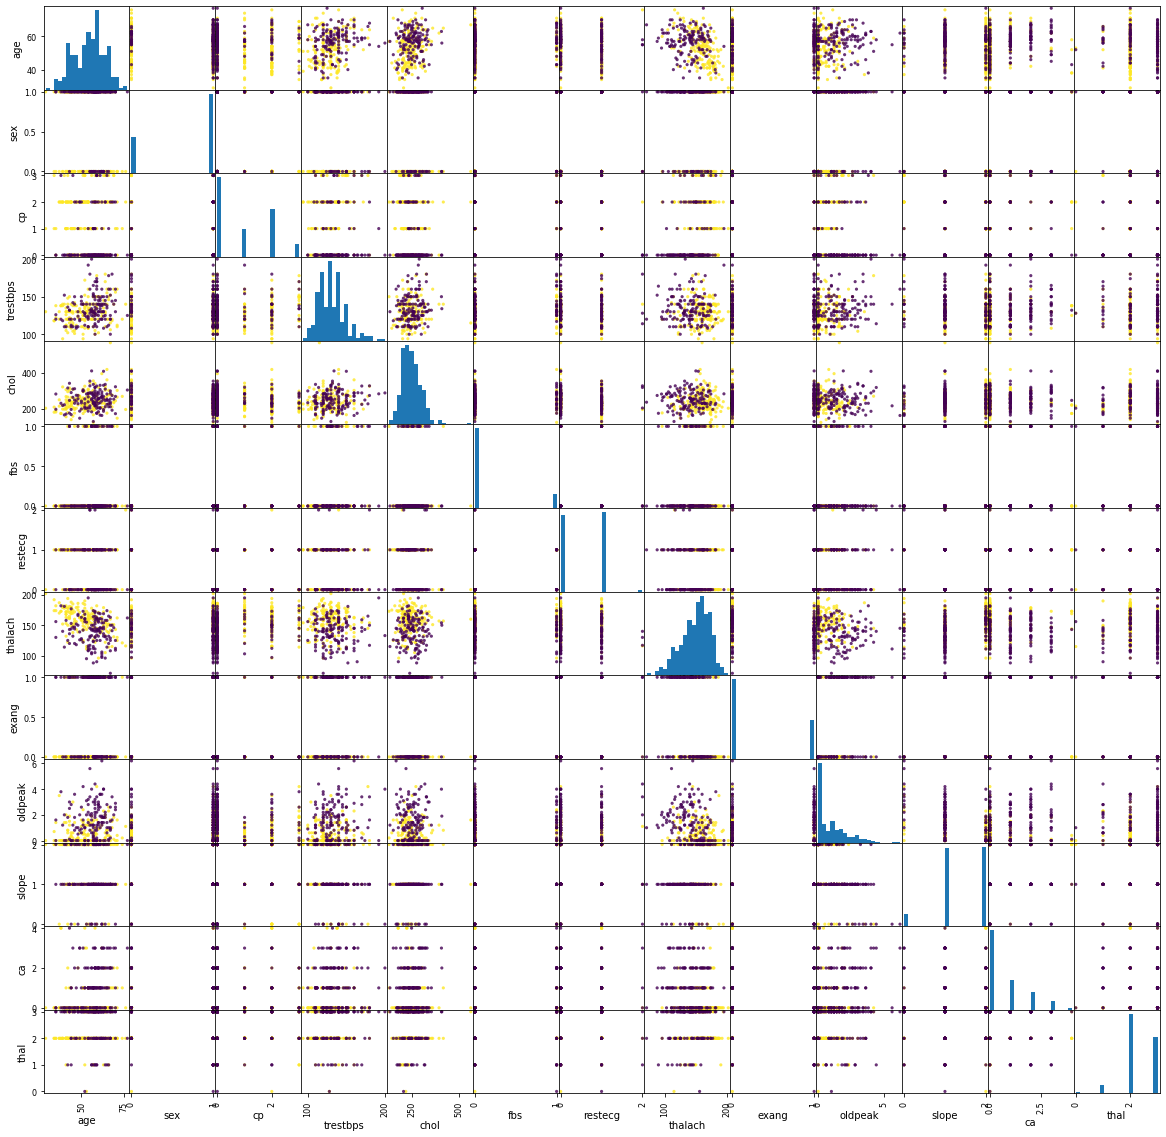

In [8]:
grr=pd.plotting.scatter_matrix(df.drop(['target'],axis=1), c=df['target'], figsize=(20,20), marker='o', 
                               hist_kwds={'bins': 20}, s=10, alpha=0.8)

In [9]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
X= df[cols].values
y= df['target'].values

In [10]:
#Encode categorical variables
from sklearn import preprocessing
Le= preprocessing.LabelEncoder()
y= Le.fit_transform(y)
df['target'] = y

Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

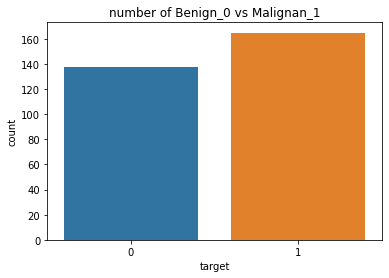

In [11]:
sns.countplot(x='target',data = df)
plt.title('number of Benign_0 vs Malignan_1')

Text(0.5, 1.0, 'Corr. between features and target')

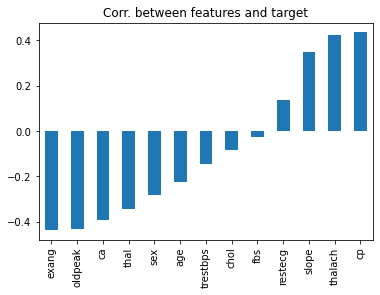

In [12]:
df.corr()['target'][:-1].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

In [13]:
X = df.drop(['target'],axis=1).values
y = df['target'].values
#split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=6.0)

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_SVM_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('SVM Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_SVM_pred_test)))

SVM Model accuracy score with criterion entropy: 0.8553


In [14]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion entropy

DT_C = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

# fit the model
Calssfier= DT_C.fit(X_train, y_train)


In [15]:
y_pred_en = DT_C.predict(X_test)

#y_pred_en
print('DT Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

DT Model accuracy score with criterion entropy: 0.8026


[Text(352.73571428571427, 391.392, 'X[2] <= 0.5\nentropy = 0.991\nsamples = 227\nvalue = [101, 126]'),
 Text(191.31428571428572, 304.416, 'X[11] <= 0.5\nentropy = 0.852\nsamples = 108\nvalue = [78, 30]'),
 Text(95.65714285714286, 217.44, 'X[8] <= 0.5\nentropy = 1.0\nsamples = 51\nvalue = [26, 25]'),
 Text(47.82857142857143, 130.464, 'X[0] <= 41.5\nentropy = 0.795\nsamples = 25\nvalue = [6, 19]'),
 Text(23.914285714285715, 43.488, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(71.74285714285715, 43.488, 'entropy = 0.667\nsamples = 23\nvalue = [4, 19]'),
 Text(143.4857142857143, 130.464, 'X[12] <= 2.5\nentropy = 0.779\nsamples = 26\nvalue = [20, 6]'),
 Text(119.57142857142857, 43.488, 'entropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(167.4, 43.488, 'entropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(286.9714285714286, 217.44, 'X[9] <= 0.45\nentropy = 0.429\nsamples = 57\nvalue = [52, 5]'),
 Text(239.14285714285714, 130.464, 'X[7] <= 159.5\nentropy = 0.837\nsamples = 15\nv

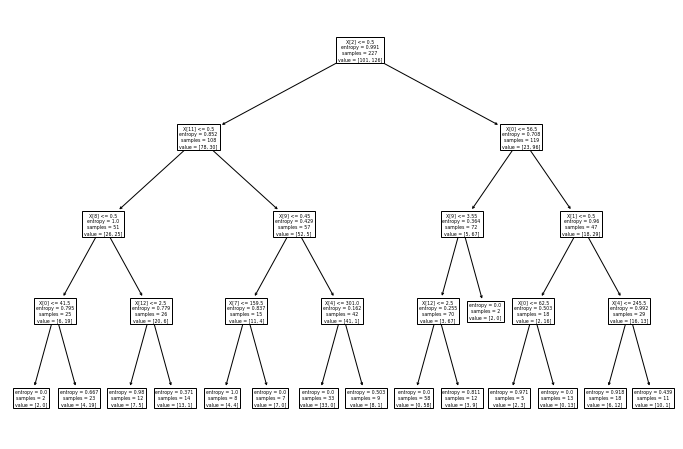

In [16]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(Calssfier)

# ___ _____________add________

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.3f}")

# Vale Prediction for SVM

In [18]:
print("Predicted values:") 
print(y_SVM_pred_test)
cal_accuracy(y_test, y_SVM_pred_test)

Predicted values:
[0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0]

Confusion Matrix: 
 [[29  8]
 [ 2 37]]

Accuracy : 86.842


# Vale Prediction for Test dataset for Decision Tree

In [19]:
print("Predicted values:") 
print(y_pred_en)
cal_accuracy(y_test, y_pred_en)

Predicted values:
[0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0
 1 0]

Confusion Matrix: 
 [[27 10]
 [ 5 34]]

Accuracy : 80.263


# Cross Validation For Models

In [20]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=5)
models=[ ('Support Vector Machine', linear_svc),('Decision Tree',Calssfier)]
warnings.simplefilter('ignore')
for model in models:
    results=model_selection.cross_val_score(model[1],X_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of  {model[0]}:: {results.mean():.3f}")

Cross validated Accuracy of  Support Vector Machine:: 0.833
Cross validated Accuracy of  Decision Tree:: 0.767


In [21]:
models=pd.DataFrame({'Model':['SVM','Decision Tree'],
                     'Traning Accuracy':[(linear_svc.score(X_train,y_train)),Calssfier.score(X_train,y_train)],
                     'Test Accuracy':[(linear_svc.score(X_test,y_test)),Calssfier.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

,Model,Traning Accuracy,Test Accuracy
0,SVM,0.867841,0.868421
1,Decision Tree,0.881057,0.802632
